In [43]:
%matplotlib inline


# OT for domain adaptation

This example introduces a domain adaptation in a 2D setting and the 4 OTDA
approaches currently supported in POT.


In [44]:
# Authors: Remi Flamary <remi.flamary@unice.fr>
#          Stanislas Chambon <stan.chambon@gmail.com>
#
# License: MIT License

import matplotlib.pylab as pl
import ot
from sklearn import svm
from sklearn.metrics import accuracy_score

## Generate data



In [45]:
n_source_samples = 150
n_target_samples = 150

Xs, ys = ot.datasets.make_data_classif('3gauss', n_source_samples)
Xt, yt = ot.datasets.make_data_classif('3gauss2', n_target_samples)

In [50]:
Xs

array([[-0.81438748, -1.42756245],
       [-0.67468182, -0.14477599],
       [-1.52413378, -2.68258031],
       [-1.24615722, -1.75632789],
       [-2.1033873 , -0.8514955 ],
       [-1.71239506, -1.2023358 ],
       [-0.65056885, -1.12049354],
       [-0.97155365, -2.02059174],
       [-0.19423697, -2.21454788],
       [ 0.01755567, -0.44567168],
       [-2.36192541, -0.68224752],
       [-0.41485232, -1.14137725],
       [-0.81787742,  0.08798271],
       [-0.9301471 , -1.03642833],
       [ 0.84409319, -0.77560761],
       [-0.83965359, -0.82367389],
       [-1.66253918,  0.32710841],
       [-0.880433  , -1.50239347],
       [ 0.12395622, -0.68865014],
       [-1.73957353, -1.28171769],
       [-0.35423766, -3.10146197],
       [-0.63862895, -2.00153417],
       [-0.54039503, -0.51974949],
       [-2.24469671, -0.99671192],
       [-0.75252237, -1.66444148],
       [ 0.01512009, -2.21609242],
       [-1.20941036, -1.18534586],
       [-1.43063774, -1.43121152],
       [ 0.15026521,

## Instantiate the different transport algorithms and fit them



In [46]:
# EMD Transport
ot_emd = ot.da.EMDTransport()
ot_emd.fit(Xs=Xs, Xt=Xt)

# Sinkhorn Transport
ot_sinkhorn = ot.da.SinkhornTransport(reg_e=1e-1)
ot_sinkhorn.fit(Xs=Xs, Xt=Xt)

# Sinkhorn Transport with Group lasso regularization
ot_lpl1 = ot.da.SinkhornLpl1Transport(reg_e=1e-1, reg_cl=1e0)
ot_lpl1.fit(Xs=Xs, ys=ys, Xt=Xt)

# Sinkhorn Transport with Group lasso regularization l1l2
ot_l1l2 = ot.da.SinkhornL1l2Transport(reg_e=1e-1, reg_cl=2e0, max_iter=20,
                                      verbose=True)
ot_l1l2.fit(Xs=Xs, ys=ys, Xt=Xt)

# transport source samples onto target samples
transp_Xs_emd = ot_emd.transform(Xs=Xs)
transp_Xs_sinkhorn = ot_sinkhorn.transform(Xs=Xs)
transp_Xs_lpl1 = ot_lpl1.transform(Xs=Xs)
transp_Xs_l1l2 = ot_l1l2.transform(Xs=Xs)

/home/wanxinli/.local/lib/python3.9/site-packages/ot/bregman.py:517: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


It.  |Loss        |Relative loss|Absolute loss
------------------------------------------------
    0|9.076388e+00|0.000000e+00|0.000000e+00
    1|1.752160e+00|4.180112e+00|7.324227e+00
    2|1.521799e+00|1.513742e-01|2.303612e-01
    3|1.467187e+00|3.722209e-02|5.461179e-02
    4|1.447892e+00|1.332640e-02|1.929519e-02
    5|1.437590e+00|7.166117e-03|1.030194e-02
    6|1.431056e+00|4.566036e-03|6.534253e-03
    7|1.425938e+00|3.589197e-03|5.117973e-03
    8|1.422716e+00|2.264705e-03|3.222032e-03
    9|1.419795e+00|2.057105e-03|2.920668e-03
   10|1.417377e+00|1.705926e-03|2.417941e-03
   11|1.415775e+00|1.132102e-03|1.602802e-03
   12|1.415541e+00|1.648390e-04|2.333365e-04
   13|1.415395e+00|1.034421e-04|1.464115e-04
   14|1.415153e+00|1.706942e-04|2.415585e-04
   15|1.415064e+00|6.300441e-05|8.915529e-05
   16|1.414497e+00|4.011921e-04|5.674849e-04
   17|1.413689e+00|5.714411e-04|8.078399e-04
   18|1.413110e+00|4.097214e-04|5.789814e-04
   19|1.412793e+00|2.246196e-04|3.173409e-04
It. 

## Fig 1 : plots source and target samples



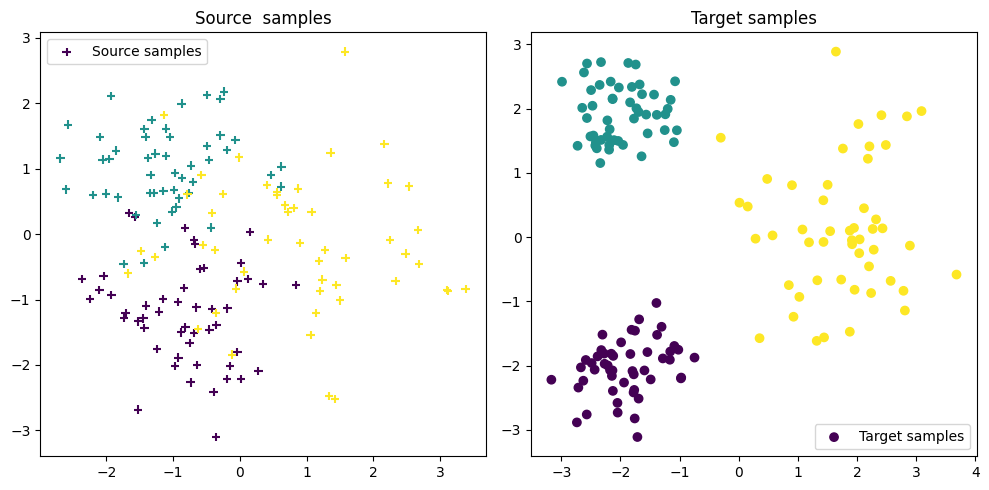

In [51]:
pl.figure(1, figsize=(10, 5))
pl.subplot(1, 2, 1)
pl.scatter(Xs[:, 0], Xs[:, 1], c=ys, marker='+', label='Source samples')
# pl.xticks([])
# pl.yticks([])
pl.legend(loc=0)
pl.title('Source  samples')

pl.subplot(1, 2, 2)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o', label='Target samples')
# pl.xticks([])
# pl.yticks([])
pl.legend(loc=0)
pl.title('Target samples')
pl.tight_layout()

## Fig 2 : plot optimal couplings and transported samples



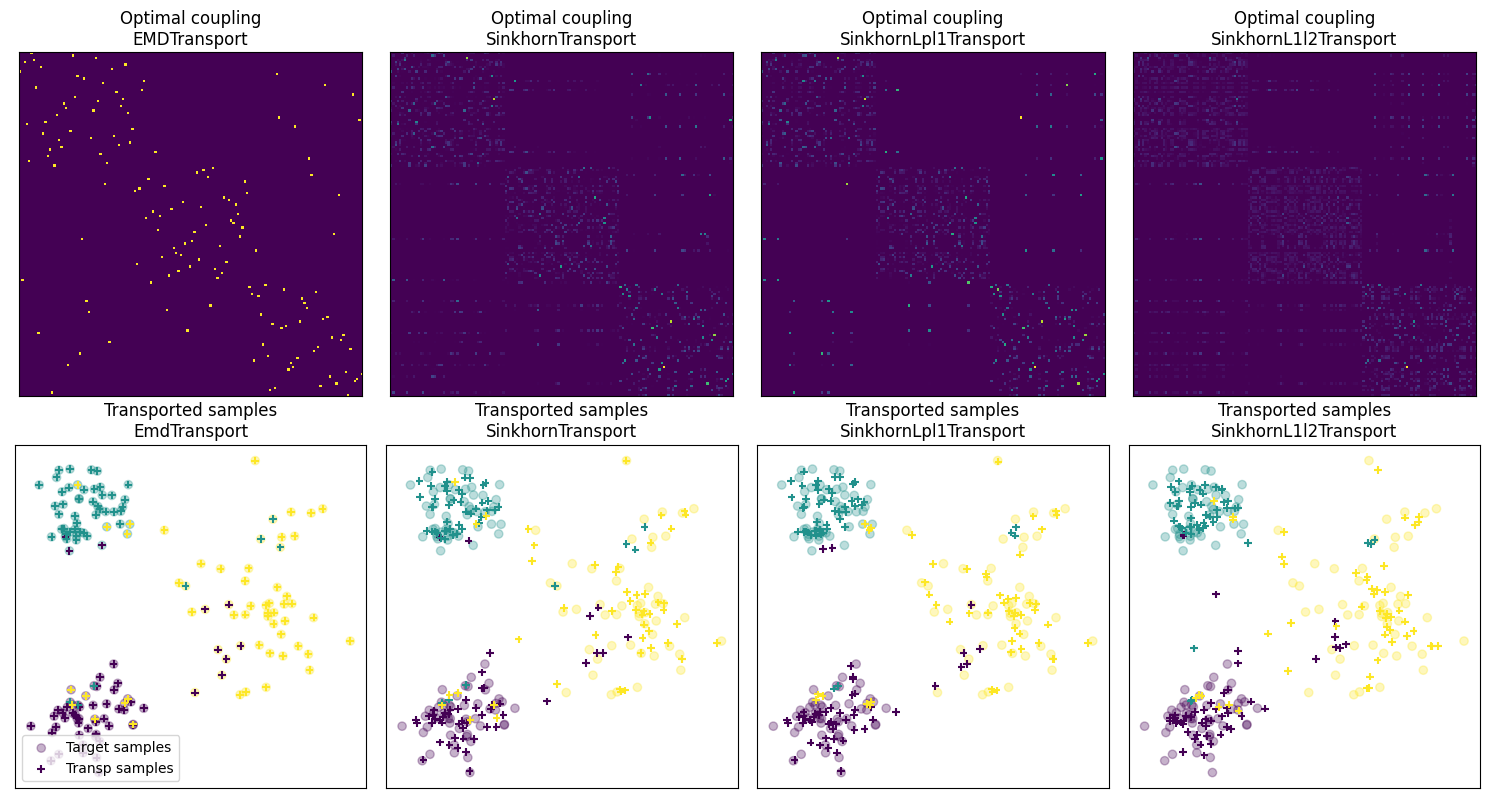

In [48]:
param_img = {'interpolation': 'nearest'}

pl.figure(2, figsize=(15, 8))
pl.subplot(2, 4, 1)
pl.imshow(ot_emd.coupling_, **param_img)
pl.xticks([])
pl.yticks([])
pl.title('Optimal coupling\nEMDTransport')

pl.subplot(2, 4, 2)
pl.imshow(ot_sinkhorn.coupling_, **param_img)
pl.xticks([])
pl.yticks([])
pl.title('Optimal coupling\nSinkhornTransport')

pl.subplot(2, 4, 3)
pl.imshow(ot_lpl1.coupling_, **param_img)
pl.xticks([])
pl.yticks([])
pl.title('Optimal coupling\nSinkhornLpl1Transport')

pl.subplot(2, 4, 4)
pl.imshow(ot_l1l2.coupling_, **param_img)
pl.xticks([])
pl.yticks([])
pl.title('Optimal coupling\nSinkhornL1l2Transport')

pl.subplot(2, 4, 5)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.3)
pl.scatter(transp_Xs_emd[:, 0], transp_Xs_emd[:, 1], c=ys,
           marker='+', label='Transp samples', s=30)
pl.xticks([])
pl.yticks([])
pl.title('Transported samples\nEmdTransport')
pl.legend(loc="lower left")

pl.subplot(2, 4, 6)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.3)
pl.scatter(transp_Xs_sinkhorn[:, 0], transp_Xs_sinkhorn[:, 1], c=ys,
           marker='+', label='Transp samples', s=30)
pl.xticks([])
pl.yticks([])
pl.title('Transported samples\nSinkhornTransport')

pl.subplot(2, 4, 7)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.3)
pl.scatter(transp_Xs_lpl1[:, 0], transp_Xs_lpl1[:, 1], c=ys,
           marker='+', label='Transp samples', s=30)
pl.xticks([])
pl.yticks([])
pl.title('Transported samples\nSinkhornLpl1Transport')

pl.subplot(2, 4, 8)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.3)
pl.scatter(transp_Xs_l1l2[:, 0], transp_Xs_l1l2[:, 1], c=ys,
           marker='+', label='Transp samples', s=30)
pl.xticks([])
pl.yticks([])
pl.title('Transported samples\nSinkhornL1l2Transport')
pl.tight_layout()

pl.show()

In [49]:
clf = svm.SVC()
clf.fit(Xt, yt)
target_pred_labels = clf.predict(Xt)
source_pred_labels = clf.predict(Xs)
trans_source_pred_labels = clf.predict(transp_Xs_sinkhorn)
print(accuracy_score(yt, target_pred_labels))
print(accuracy_score(ys, source_pred_labels))
print(accuracy_score(ys, trans_source_pred_labels)) # TODO: why????? is this too much better then my simulation

0.9933333333333333
0.76
0.82
